<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Deep%20learning%20with%20PyTorch/Amsterdam_House_Price_Prediction_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from torchvision.datasets.utils import download_url
from pandas import DataFrame

In [ ]:
raw_data = pd.read_csv('/content/HousingPrices-Amsterdam-August-2021.csv')
raw_data.head()

,Unnamed: 0,Address,Zip,Price,Area,Room,Lon,Lat
0,1,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,2,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,3,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,4,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,5,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538


In [ ]:
raw_data.describe()

,Unnamed: 0,Price,Area,Room,Lon,Lat
count,924.000000,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,462.500000,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,266.880123,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.000000,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,231.750000,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,462.500000,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,693.250000,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,924.000000,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [ ]:
numeric_colmuns = []
numeric_colmuns.extend(list(raw_data.dtypes[raw_data.dtypes == np.int64].index))
numeric_colmuns.extend(list(raw_data.dtypes[raw_data.dtypes == np.float64].index))

In [ ]:
numeric_colmuns

['Unnamed: 0', 'Area', 'Room', 'Price', 'Lon', 'Lat']

In [ ]:
numeric_colmuns.remove('Price')
numeric_colmuns.append('Price')

Remove Unnamed: 0

In [ ]:
numeric_colmuns.remove('Unnamed: 0')

Get Numeric Data

In [ ]:
numeric_data = DataFrame(raw_data, columns=numeric_colmuns)


Explore Numeric Data

In [ ]:
numeric_data.describe()

,Area,Room,Lon,Lat,Price
count,924.000000,924.000000,924.000000,924.000000,9.200000e+02
mean,95.952381,3.571429,4.888605,52.363326,6.220654e+05
std,57.447436,1.592332,0.053140,0.024028,5.389942e+05
min,21.000000,1.000000,4.644819,52.291519,1.750000e+05
25%,60.750000,3.000000,4.855834,52.352077,3.500000e+05
50%,83.000000,3.000000,4.886818,52.364631,4.670000e+05
75%,113.000000,4.000000,4.922337,52.377598,7.000000e+05
max,623.000000,14.000000,5.029122,52.423805,5.950000e+06


In [ ]:
numeric_data.head(10)

,Area,Room,Lon,Lat,Price
0,64,3,4.907736,52.356157,685000.0
1,60,3,4.850476,52.348586,475000.0
2,109,4,4.944774,52.343782,850000.0
3,128,6,4.789928,52.343712,580000.0
4,138,5,4.902503,52.410538,720000.0
5,53,2,4.875024,52.382228,450000.0
6,87,3,4.896536,52.410585,450000.0
7,80,2,4.871555,52.371041,590000.0
8,49,3,4.854671,52.363471,399000.0
9,33,2,4.897142,52.353111,300000.0


Nan Data

In [ ]:
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [ ]:
nan_columns

['Price']

Assume NAN values as 0

In [ ]:
numeric_data['Price'] = numeric_data['Price'].fillna(0)

check NAN Data

In [ ]:
nan_columns = np.any(pd.isna(numeric_data), axis = 0)
nan_columns = list(nan_columns[nan_columns == True].index)

In [ ]:
nan_columns

[]

Linear Regression with Numeric Data

In [ ]:
import torch
import torch.nn as nn

In [ ]:
numeric_x_columns = list(numeric_data.columns)
numeric_x_columns.remove('Price')
numeric_y_columns = ['Price']

In [ ]:
numeric_x_columns

['Area', 'Room', 'Lon', 'Lat']

In [ ]:
numeric_x_df = DataFrame(numeric_data, columns = numeric_x_columns)
numeric_y_df = DataFrame(numeric_data, columns = numeric_y_columns)

In [ ]:
numeric_x = torch.tensor(numeric_x_df.values, dtype = torch.float)
numeric_y = torch.tensor(numeric_y_df.values, dtype = torch.float)

check shape

In [ ]:
numeric_x.shape 


torch.Size([924, 4])

In [ ]:
numeric_y.shape

torch.Size([924, 1])

In [ ]:
numeric_x.dtype

torch.float32

In [ ]:
numeric_y.dtype

torch.float32

Create PyTorch datasets and dataloaders for training and validation

Tensor Dataset

In [ ]:
from torch.utils.data import DataLoader, TensorDataset, random_split

batch_size = 64
learning_rate = 5e-7

input_size= 4
output_size= 1

Convert to PyTorch dataset

In [ ]:
dataset = TensorDataset(torch.tensor(numeric_x, dtype = torch.float32), torch.tensor(numeric_y, dtype = torch.float32))
train_ds, val_ds = random_split(dataset, [724, 200])

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size * 2)

len(train_loader), len(val_loader)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


(12, 2)

Model

In [ ]:
class AmsterdamHousingModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, xb):
    out = self.linear(xb)
    return out


  def training_step(self, batch):
    numeric_x, numeric_y = batch
    out = self(numeric_x)
    loss = F.mse_loss(out, numeric_y)
    return loss

  def validation_step(self, batch):
    numeric_x, numeric_y = batch
    out = self(numeric_x)
    loss = F.mse_loss(out, numeric_y)
    return {'val_loss': loss.detach()}

  def validation_epoch_end(self, outputs):
    batch_losses = [x['val_loss'] for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean() 
    return {'val_loss': epoch_loss.item()}


  def epoch_end(self, epoch, result):
    print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))



         

In [ ]:
model = AmsterdamHousingModel() 

Training

In [ ]:
def evaluate(model, val_loader):
  outputs = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)



def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)

  return history    


In [ ]:
result = evaluate(model, val_loader)
result

{'val_loss': 468341063680.0}

In [ ]:
history = fit(10, learning_rate, model, train_loader, val_loader)

Epoch [0], val_loss: 332352192512.0000
Epoch [1], val_loss: 234688561152.0000
Epoch [2], val_loss: 172946948096.0000
Epoch [3], val_loss: 131296280576.0000
Epoch [4], val_loss: 103368491008.0000
Epoch [5], val_loss: 84291567616.0000
Epoch [6], val_loss: 72381349888.0000
Epoch [7], val_loss: 63776239616.0000
Epoch [8], val_loss: 58410782720.0000
Epoch [9], val_loss: 55481057280.0000


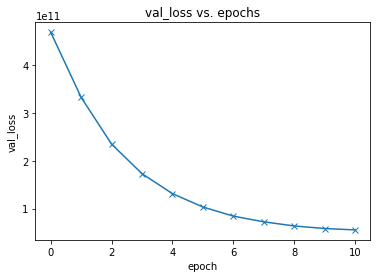

In [ ]:
losses = [r['val_loss'] for r in [result] + history]
plt.plot(losses, '-x')
plt.xlabel('epoch')
plt.ylabel('val_loss')
plt.title('val_loss vs. epochs');